In [51]:
pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
forestci 0.5.1 requires numpy>=1.18.4, but you have numpy 1.16.6 which is incompatible.


In [33]:
#Importing libraries
import xgboost
from xgboost import XGBRFClassifier

import os
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot

import imblearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [114]:
#Getting Dataset
training = pd.read_csv('../data/final_project/training.csv')
testing = pd.read_csv('../data/final_project/test_features.csv')
y_test = pd.read_csv('../data/final_project/y_test.csv', header=None)
testing.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days
0,A782657,Adoption,Spayed Female,NaN,1911 Dear Run Drive in Austin (TX),Stray,Normal,Dog,Intact Female,Labrador Retriever Mix,Black,60
1,A804622,Adoption,Neutered Male,NaN,702 Grand Canyon in Austin (TX),Stray,Normal,Dog,Intact Male,Boxer/Anatol Shepherd,Brown/Tricolor,60
2,A786693,Return to Owner,Neutered Male,Zeus,Austin (TX),Public Assist,Normal,Dog,Neutered Male,Australian Cattle Dog/Pit Bull,Black/White,3285
3,A693330,Adoption,Spayed Female,Hope,Levander Loop & Airport Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,Miniature Poodle,Gray,1825
4,A812431,Adoption,Neutered Male,NaN,Austin (TX),Owner Surrender,Injured,Cat,Intact Male,Domestic Shorthair,Blue/White,210


In [115]:
#Basic EDA to learn more about the dataset
training.shape

(71538, 13)

In [116]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71538 entries, 0 to 71537
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pet ID                71538 non-null  object
 1   Outcome Type          71533 non-null  object
 2   Sex upon Outcome      71537 non-null  object
 3   Name                  44360 non-null  object
 4   Found Location        71538 non-null  object
 5   Intake Type           71538 non-null  object
 6   Intake Condition      71538 non-null  object
 7   Pet Type              71538 non-null  object
 8   Sex upon Intake       71537 non-null  object
 9   Breed                 71538 non-null  object
 10  Color                 71538 non-null  object
 11  Age upon Intake Days  71538 non-null  int64 
 12  Time at Center        71538 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 7.1+ MB


Text(0.5, 1.0, 'Class Breakdown')

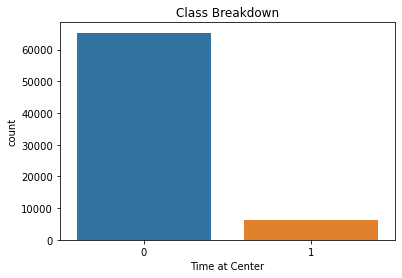

In [117]:
#Goal: Classify whether the animals will be transferred or adopted 

#Exploratory Data Analysis shows that the main two classes are unbalanced! Since we have substantially more 0s than 1s, we balance the dataset
sns.countplot(x=training['Time at Center']).set_title("Class Breakdown")

In [118]:
training = training.drop(["Name", "Found Location"], axis=1)
testing = testing.drop(["Name", "Found Location"], axis=1)
testing.dropna()
testing.dropna()

X_train = training.iloc[:, 1:-1].values
X_test = testing.iloc[:, 1:].values
y_train = training.iloc[:,-1].values
y_test = y_test.iloc[:,-1].values

Text(0.5, 1.0, 'Class Breakdown - Balanced')

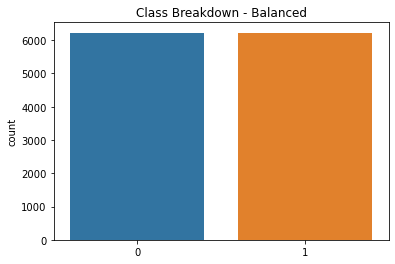

In [119]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy='majority')
X_bal, y_bal = under_sampler.fit_resample(X_train, y_train)
sns.countplot(x=y_bal).set_title("Class Breakdown - Balanced")

In [120]:
#One-hot encoding the variables in the factors dataset
x_encoder = OneHotEncoder(handle_unknown = 'ignore')
x_encoder.fit(X_bal)
encX_train = x_encoder.transform(X_bal)
encX_test = x_encoder.transform(X_test)

In [121]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(encX_train, y_bal)

RandomForestClassifier(criterion='entropy', random_state=0)

In [122]:
y_pred = classifier.predict(encX_test)
confMatrix = confusion_matrix(y_test, y_pred)
print(confMatrix)

accuracy_score(y_test, y_pred)

[[18741  2992]
 [  459  1654]]


0.8552797114820095